In [3]:
import pandas as pd

## (a)

In [4]:
d = {'standard': [80, 93, 83, 89, 98, 81, 93], 'novel': [100, 103, 104, 99, 102, 101, 103]}

In [5]:
df = pd.DataFrame(data = d)

In [6]:
df

,standard,novel
0,80,100
1,93,103
2,83,104
3,89,99
4,98,102
5,81,101
6,93,103


## (b)

<AxesSubplot:>

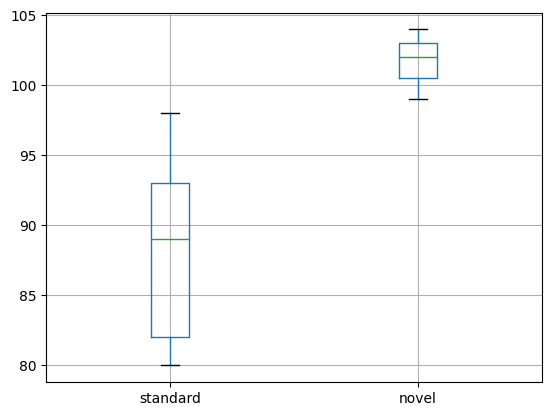

In [9]:
df.boxplot(column=['standard', 'novel'])

I don't think assumption of normality has been violated according to the boxplot above. Even though the boxplot is not perfectly symmetric, there's no outliers.

## (c)

**Null Hypothesis**  
$H_0 : \mu =0$  
$H_a = \mu \neq 0$

**Structural Model and Test Statistic**  
The statistic is calculated as $$t~\frac{mean(standard)-mean(novel)}{standard error}$$   
The statistic will be positive when the sample mean of standard is greater the the sample of b and negative when the sample mean of a is less than the sample mean of b

In [12]:
from scipy import stats


In [13]:
t, p = stats.ttest_ind(df['standard'], df['novel'])

In [14]:
t

-5.009259267190251

the observed t value is -5.009

In [15]:
p

0.00030455436049232464

**We can use scipy to find the critical t value**  
the degree of freedom is 6 since we have 7 samples in each groups

In [20]:
t_critical = stats.t.ppf(q=1-.05/2,df=6)
t_critical

2.4469118487916806

Since the absolute value of the ovserve t value is greater than the critical t value, the null hypothesis is rejected. The final conclusion is that the mean reading score for first graders who learned under the novel method is greater than the mean reading score for first graders who learned under the traditional method. 

## (d)

To run welch's test, we can pass False to equal_vr parameter

In [21]:
t, p = stats.ttest_ind(df['standard'], df['novel'], equal_var=False)

In [22]:
t

-5.009259267190251

In [24]:
def welch_dof(x,y):
        dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
        print(f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")
        
welch_dof(df['standard'], df['novel'])

Welch-Satterthwaite Degrees of Freedom= 6.8035


In [25]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(df['standard'], df['novel'])


 Welch's t-test= -5.0093 
 p-value = 0.0017 
 Welch-Satterthwaite Degrees of Freedom= 6.8035


**Difference**
In (c), the t-test assumes that the sample means being compared for two populations are normally distributes, and that the populations have equal variances. Welch's t-test is designed for unequal population variances, bu the assumption of normality is maintained. 

Welch t-test is robust for testing the mean equality when homogeneity assumption is not satisfied. 

## (e)

In [29]:
import numpy as np

In [33]:
import statsmodels.stats.api as sms


In [36]:
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import t
import pandas as pd

def welch_ttest(x1, x2,alternative):
    
    n1 = x1.size
    n2 = x2.size
    m1 = np.mean(x1)
    m2 = np.mean(x2)
    
    v1 = np.var(x1, ddof=1)
    v2 = np.var(x2, ddof=1)
    
    pooled_se = np.sqrt(v1 / n1 + v2 / n2)
    delta = m1-m2
    
    tstat = delta /  pooled_se
    df = (v1 / n1 + v2 / n2)**2 / (v1**2 / (n1**2 * (n1 - 1)) + v2**2 / (n2**2 * (n2 - 1)))
    
    # two side t-test
    p = 2 * t.cdf(-abs(tstat), df)
    
    # upper and lower bounds
    lb = delta - t.ppf(0.975,df)*pooled_se 
    ub = delta + t.ppf(0.975,df)*pooled_se
  
    return pd.DataFrame(np.array([tstat,df,p,delta,lb,ub]).reshape(1,-1),
                         columns=['T statistic','df','pvalue 2 sided','Difference in mean','lb','ub'])

In [39]:
welch_ttest(df['standard'], df['novel'], 0.025)

,T statistic,df,pvalue 2 sided,Difference in mean,lb,ub
0,-5.009259,6.803487,0.001685,-13.571429,-20.015534,-7.127323



From the results above, we can tell that we are 95% confident about the difference of mean between $[-20.016, -7,127]$

## (f)

t test give you the result of all data. While the confidence interval let you know which of the Raw data is not laying within the confidence interval. A t-test at alpha significance level is identical with an (1-alpha/2) confidence interval when the test is two-tailed. In this case, they're identical. 

## (g)

I cannot conclude that teaching method is a causal factor of the observed mean difference. There are other factors could affect the final results, like who the teacher is and the teaching content.